In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
demography = pd.read_csv('csv_Demographie_100m_Gitter/Bevoelkerung100M.csv', delimiter=';', encoding="cp1252")



In [4]:
demography

,Gitter_ID_100m,Gitter_ID_100m_neu,Merkmal,Auspraegung_Code,Auspraegung_Text,Anzahl,Anzahl_q
0,100mN26891E43370,CRS3035RES100mN2689100E4337000,INSGESAMT,0,Einheiten insgesamt,8,0
1,100mN26891E43370,CRS3035RES100mN2689100E4337000,ALTER_KURZ,1,Unter 18,3,0
2,100mN26891E43370,CRS3035RES100mN2689100E4337000,ALTER_KURZ,3,30 - 49,3,0
3,100mN26891E43370,CRS3035RES100mN2689100E4337000,ALTER_KURZ,5,65 und älter,3,0
4,100mN26891E43370,CRS3035RES100mN2689100E4337000,FAMSTND_AUSF,1,Ledig,4,0
...,...,...,...,...,...,...,...
66460410,100mN35508E42187,CRS3035RES100mN3550800E4218700,RELIGION_KURZ,2,Evangelische Kirche (öffentlich-rechtlich),3,0
66460411,100mN35508E42187,CRS3035RES100mN3550800E4218700,STAATSANGE_GRP,1,Deutschland,4,0
66460412,100mN35508E42187,CRS3035RES100mN3550800E4218700,STAATSANGE_HLND,1,Deutschland,4,0
66460413,100mN35508E42187,CRS3035RES100mN3550800E4218700,STAATSANGE_KURZ,1,Deutschland,4,0


In [5]:
#read excel
translations = pd.read_excel('Data_Format_Census.xlsx', sheet_name='Translations')


In [6]:
translations

,Original,Translated
0,Merkmal,NaN
1,Auspraegung_Text,NaN
2,INSGESAMT,TOTAL
3,Einheiten insgesamt,Total
4,FAMTYP_KIND,FAMTYPE_CHILDREN
...,...,...
206,1 Wohnung,1 apartment
207,2 Wohnungen,2 apartments
208,3 - 6 Wohnungen,3 - 6 apartments
209,7 - 12 Wohnungen,7 - 12 apartments


In [7]:
#tansfrom to dictionary with original as key and translation as value
translation_dict = translations.set_index('Original')['Translated'].to_dict()
#translations_dict = dict(zip(translations['Original'], translations['Translated']))

In [8]:
pivot_df = demography.pivot(index='Gitter_ID_100m',columns=['Merkmal', 'Auspraegung_Text'], values='Anzahl')

In [12]:
#rename columns with trtanslation_dict
pivot_df = pivot_df.rename(columns=translation_dict)

In [14]:
pivot_df = pivot_df.rename(columns={' INSGESAMT': 'TOTAL'})
pivot_df

Merkmal          TOTAL    AGE_5                      MARITAL_STATUS          \
Auspraegung_Text Total Under 18 30 - 49 65 and older         Single Married   
Gitter_ID_100m                                                                
100mN26891E43370   8.0      3.0     3.0          3.0            4.0     3.0   
100mN26891E43411   7.0      3.0     3.0          NaN            4.0     3.0   
100mN26908E43412   3.0      NaN     NaN          NaN            NaN     3.0   
100mN26912E43412  10.0      4.0     3.0          3.0            6.0     4.0   
100mN26917E43411  10.0      3.0     NaN          3.0            4.0     3.0   
...                ...      ...     ...          ...            ...     ...   
100mN35476E42198   8.0      NaN     3.0          4.0            3.0     6.0   
100mN35476E42199  18.0      NaN     5.0          6.0            8.0     7.0   
100mN35476E42200  10.0      NaN     9.0          NaN            5.0     3.0   
100mN35476E42201   8.0      NaN     NaN          5.0            NaN     5.0   
100mN35508E42187   4.0      NaN     3.0          NaN            NaN     3.0   

Merkmal          COUNTRY_OF_BIRTH              GENDER         ...  \
Auspraegung_Text          Germany EU27 country   Male Female  ...   
Gitter_ID_100m                                                ...   
100mN26891E43370              6.0          3.0    4.0    4.0  ...   
100mN26891E43411              7.0          NaN    4.0    3.0  ...   
100mN26908E43412              3.0          NaN    NaN    NaN  ...   
100mN26912E43412             10.0          NaN    6.0    4.0  ...   
100mN26917E43411             10.0          NaN    4.0    6.0  ...   
...                           ...          ...    ...    ...  ...   
100mN35476E42198              8.0          NaN    4.0    4.0  ...   
100mN35476E42199             15.0          NaN    5.0   13.0  ...   
100mN35476E42200             10.0          NaN    8.0    3.0  ...   
100mN35476E42201              6.0          NaN    5.0    3.0  ...   
100mN35508E42187              4.0          NaN    3.0    3.0  ...   

Merkmal          NATIONALITY_COUNTRY                           MARITAL_STATUS  \
Auspraegung_Text             Romania Netherlands Registered civil partnership   
Gitter_ID_100m                                                                  
100mN26891E43370                 NaN         NaN                          NaN   
100mN26891E43411                 NaN         NaN                          NaN   
100mN26908E43412                 NaN         NaN                          NaN   
100mN26912E43412                 NaN         NaN                          NaN   
100mN26917E43411                 NaN         NaN                          NaN   
...                              ...         ...                          ...   
100mN35476E42198                 NaN         NaN                          NaN   
100mN35476E42199                 NaN         NaN                          NaN   
100mN35476E42200                 NaN         NaN                          NaN   
100mN35476E42201                 NaN         NaN                          NaN   
100mN35508E42187                 NaN         NaN                          NaN   

Merkmal           NATIONALITY_COUNTRY NATIONALITY_NO NATIONALITY_GROUP  \
Auspraegung_Text Russische Föderation      Not known             Other   
Gitter_ID_100m                                                           
100mN26891E43370                  NaN            NaN               NaN   
100mN26891E43411                  NaN            NaN               NaN   
100mN26908E43412                  NaN            NaN               NaN   
100mN26912E43412                  NaN            NaN               NaN   
100mN26917E43411                  NaN            NaN               NaN   
...                               ...            ...               ...   
100mN35476E42198                  NaN            NaN               NaN   
100mN35476E42199                  NaN            Na

In [15]:
#print unique columns
print(pivot_df.columns.get_level_values(0).unique())

Index(['TOTAL', 'AGE_5', 'MARITAL_STATUS', 'COUNTRY_OF_BIRTH', 'GENDER',
       'RELIGION', 'NATIONALITY_GROUP', 'NATIONALITY_COUNTRY', 'NATIONALITY',
       'NATIONALITY_NO', 'AGE_10'],
      dtype='object', name='Merkmal')


In [16]:
total = pivot_df['TOTAL']['Total'].sum()

In [18]:
pivot_df[['TOTAL','AGE_5']]

Merkmal          TOTAL    AGE_5                                     
Auspraegung_Text Total Under 18 30 - 49 65 and older 18 - 29 50 - 64
Gitter_ID_100m                                                      
100mN26891E43370   8.0      3.0     3.0          3.0     NaN     NaN
100mN26891E43411   7.0      3.0     3.0          NaN     3.0     NaN
100mN26908E43412   3.0      NaN     NaN          NaN     NaN     NaN
100mN26912E43412  10.0      4.0     3.0          3.0     3.0     NaN
100mN26917E43411  10.0      3.0     NaN          3.0     NaN     4.0
...                ...      ...     ...          ...     ...     ...
100mN35476E42198   8.0      NaN     3.0          4.0     NaN     NaN
100mN35476E42199  18.0      NaN     5.0          6.0     5.0     NaN
100mN35476E42200  10.0      NaN     9.0          NaN     NaN     NaN
100mN35476E42201   8.0      NaN     NaN          5.0     NaN     3.0
100mN35508E42187   4.0      NaN     3.0          NaN     NaN     NaN

[3177723 rows x 6 columns]

In [21]:
pivot_df['AGE_5_DC'] = pivot_df['AGE_5'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['MARITAL_STATUS_DC'] = pivot_df['MARITAL_STATUS'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['COUNTRY_OF_BIRTH_DC'] = pivot_df['COUNTRY_OF_BIRTH'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['GENDER_DC'] = pivot_df['GENDER'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['RELIGION_DC'] = pivot_df['RELIGION'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['NATIONALITY_GROUP_DC'] = pivot_df['NATIONALITY_GROUP'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['NATIONALITY_COUNTRY_DC'] = pivot_df['NATIONALITY_COUNTRY'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['NATIONALITY_DC'] = pivot_df['NATIONALITY'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['NATIONALITY_NO_DC'] = pivot_df['NATIONALITY_NO'].sum(axis=1) / pivot_df['TOTAL']['Total']
pivot_df['AGE_10_DC'] = pivot_df['AGE_10'].sum(axis=1) / pivot_df['TOTAL']['Total']




In [22]:
pivot_df[['TOTAL', 'AGE_5', 'AGE_5_DC']]

Merkmal          TOTAL    AGE_5                                       AGE_5_DC
Auspraegung_Text Total Under 18 30 - 49 65 and older 18 - 29 50 - 64          
Gitter_ID_100m                                                                
100mN26891E43370   8.0      3.0     3.0          3.0     NaN     NaN  1.125000
100mN26891E43411   7.0      3.0     3.0          NaN     3.0     NaN  1.285714
100mN26908E43412   3.0      NaN     NaN          NaN     NaN     NaN  0.000000
100mN26912E43412  10.0      4.0     3.0          3.0     3.0     NaN  1.300000
100mN26917E43411  10.0      3.0     NaN          3.0     NaN     4.0  1.000000
...                ...      ...     ...          ...     ...     ...       ...
100mN35476E42198   8.0      NaN     3.0          4.0     NaN     NaN  0.875000
100mN35476E42199  18.0      NaN     5.0          6.0     5.0     NaN  0.888889
100mN35476E42200  10.0      NaN     9.0          NaN     NaN     NaN  0.900000
100mN35476E42201   8.0      NaN     NaN          5.0     NaN     3.0  1.000000
100mN35508E42187   4.0      NaN     3.0          NaN     NaN     NaN  0.750000

[3177723 rows x 7 columns]

In [27]:
age5 = pivot_df['AGE_5'].sum().sum()
marital_status = pivot_df['MARITAL_STATUS_DC'].sum().sum()
country_of_birth = pivot_df['COUNTRY_OF_BIRTH_DC'].sum().sum()
gender = pivot_df['GENDER_DC'].sum().sum()
religion = pivot_df['RELIGION_DC'].sum().sum()
nationality_group = pivot_df['NATIONALITY_GROUP_DC'].sum().sum()
nationality_country = pivot_df['NATIONALITY_COUNTRY_DC'].sum().sum()
nationality = pivot_df['NATIONALITY_DC'].sum().sum()
nationality_no = pivot_df['NATIONALITY_NO_DC'].sum().sum()
age10 = pivot_df['AGE_10_DC'].sum().sum()



In [30]:
print('age5:', age5/total*100)
print('marital_status:', marital_status/total*100)
print('country_of_birth:', country_of_birth/total*100)
print('gender:' ,gender/total*100)
print('religion:', religion/total*100)
print('national_grp: ', nationality_group/total*100)
print('national_country:', nationality_country/total*100)
print('nationality:', nationality/total*100)
print('national_no: ', nationality_no/total*100)
print('age10:', age10/total*100)




age5: 99.79045688824209
marital_status: 3.8977088036192638
country_of_birth: 3.817435556151484
gender: 3.8000647088744164
religion: 3.8090451814323414
national_grp:  3.9062444079059615
national_country: 3.8883270583316025
nationality: 3.923380460898144
national_no:  3.9302395675447235
age10: 3.51696279621213


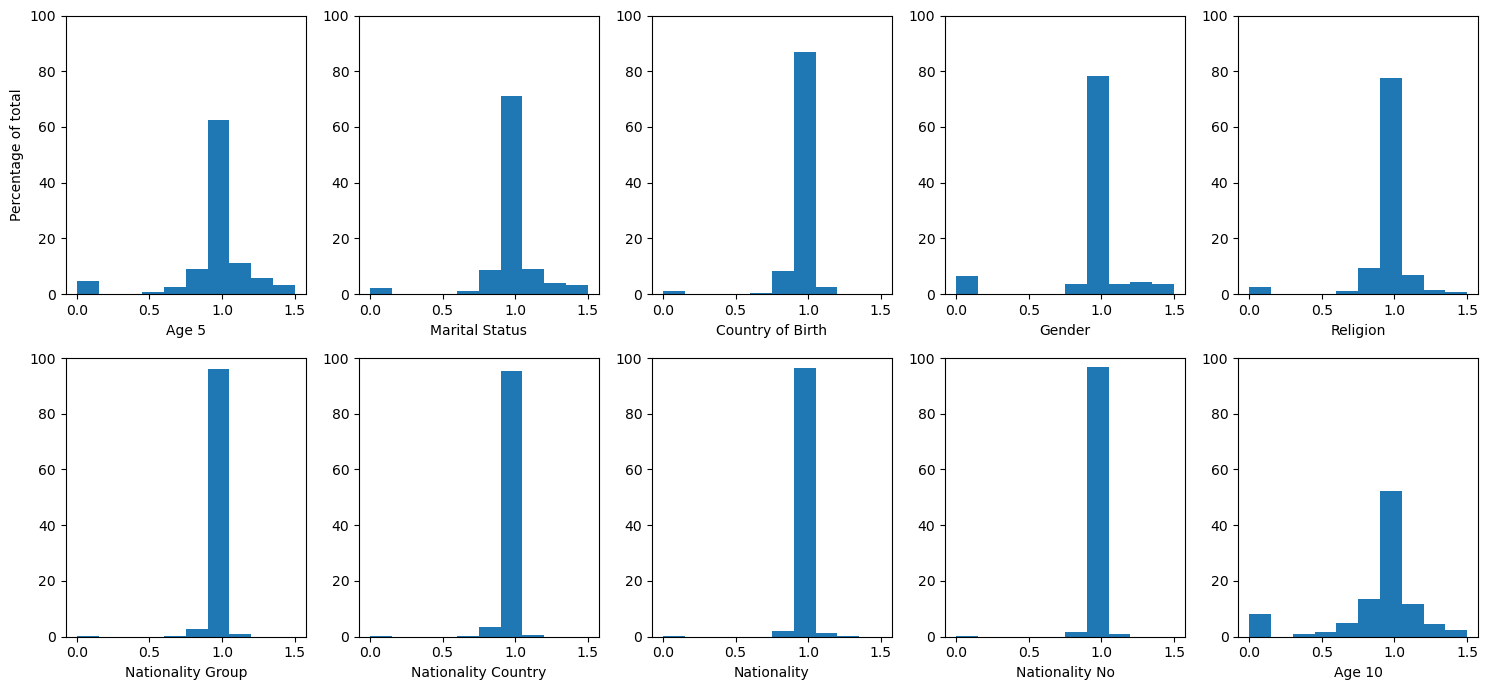

In [32]:
data1 = pivot_df['AGE_5_DC']
data2 = pivot_df['MARITAL_STATUS_DC']
data3 = pivot_df['COUNTRY_OF_BIRTH_DC']
data4 = pivot_df['GENDER_DC']
data5 = pivot_df['RELIGION_DC']
data6 = pivot_df['NATIONALITY_GROUP_DC']
data7 = pivot_df['NATIONALITY_COUNTRY_DC']
data8 = pivot_df['NATIONALITY_DC']
data9 = pivot_df['NATIONALITY_NO_DC']
data10 = pivot_df['AGE_10_DC']


counts1, bins1 = np.histogram(data1)
counts1 = counts1/counts1.sum()*100

counts2, bins2 = np.histogram(data2)
counts2 = counts2/counts2.sum()*100

counts3, bins3 = np.histogram(data3)
counts3 = counts3/counts3.sum()*100

counts4, bins4 = np.histogram(data4)
counts4 = counts4/counts4.sum()*100

counts5, bins5 = np.histogram(data5)
counts5 = counts5/counts5.sum()*100

counts6, bins6 = np.histogram(data6)
counts6 = counts6/counts6.sum()*100

counts7, bins7 = np.histogram(data7)
counts7 = counts7/counts7.sum()*100

counts8, bins8 = np.histogram(data8)
counts8 = counts8/counts8.sum()*100

counts9, bins9 = np.histogram(data9)
counts9 = counts9/counts9.sum()*100

counts10, bins10 = np.histogram(data10)
counts10 = counts10/counts10.sum()*100






plt.figure(figsize=(15,7))
plt.subplot(2,5,1)
plt.hist(bins1[:-1], bins1, weights=counts1)
plt.xlabel('Age 5')
plt.ylabel('Percentage of total')
plt.ylim(0,100)
plt.subplot(2,5,2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.xlabel('Marital Status')
plt.ylim(0,100)
plt.subplot(2,5,3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.xlabel('Country of Birth')
plt.ylim(0,100)
plt.subplot(2,5,4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.xlabel('Gender')
plt.ylim(0,100)
plt.subplot(2,5,5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.xlabel('Religion')
plt.ylim(0,100)
plt.subplot(2,5,6)
plt.hist(bins6[:-1], bins6, weights=counts6)
plt.xlabel('Nationality Group')
plt.ylim(0,100)
plt.subplot(2,5,7)
plt.hist(bins7[:-1], bins7, weights=counts7)
plt.xlabel('Nationality Country')
plt.ylim(0,100)
plt.subplot(2,5,8)
plt.hist(bins8[:-1], bins8, weights=counts8)
plt.xlabel('Nationality')
plt.ylim(0,100)
plt.subplot(2,5,9)
plt.hist(bins9[:-1], bins9, weights=counts9)
plt.xlabel('Nationality No')
plt.ylim(0,100)
plt.subplot(2,5,10)
plt.hist(bins10[:-1], bins10, weights=counts10)
plt.xlabel('Age 10')
plt.ylim(0,100)


plt.tight_layout()


plt.show()



In [33]:
pivot_df.to_csv('Demographics_100m_pivot.csv', sep=',', encoding="cp1252")